In [64]:
import trimesh
import numpy as np



In [65]:
obj_file = "D:/Geomatics/thesis/objtryouts/square.obj"


In [66]:
mesh = trimesh.load(obj_file)
vertices = mesh.vertices
faces = mesh.faces


In [67]:
print(vertices)

[[ 5.  4.  0.]
 [ 5.  4.  6.]
 [12.  4.  0.]
 [12.  4.  6.]
 [12.  4.  0.]
 [12.  4.  6.]
 [12. 11.  0.]
 [12. 11.  6.]
 [12. 11.  0.]
 [12. 11.  6.]
 [ 5. 11.  0.]
 [ 5. 11.  6.]
 [ 5. 11.  0.]
 [ 5. 11.  6.]
 [ 5.  4.  0.]
 [ 5.  4.  6.]
 [ 5.  4.  0.]
 [12.  4.  0.]
 [12. 11.  0.]
 [ 5. 11.  0.]
 [ 5.  4.  6.]
 [12.  4.  6.]
 [12. 11.  6.]
 [ 5. 11.  6.]]


In [68]:
x = np.arange(1, 21)
y = np.arange(1, 21)
z = np.full_like(x,10 )

ray_origins = np.array([[xi, yi, zi] for xi in x for yi in y for zi in z])

ray_directions = np.tile(np.array([0, 0, -1]), (ray_origins.shape[0], 1))

In [69]:
locations, index_ray, index_tri = mesh.ray.intersects_location(
    ray_origins=ray_origins, ray_directions=ray_directions
)

In [70]:
print(locations)

[[8. 8. 0.]
 [8. 8. 0.]
 [8. 8. 0.]
 ...
 [9. 9. 6.]
 [9. 9. 6.]
 [9. 9. 6.]]


In [71]:
print(index_tri)

[4 4 4 ... 7 7 7]


In [72]:
ray_visualize = trimesh.load_path(
    np.hstack((ray_origins, ray_origins + ray_directions * 5.0)).reshape(-1, 2, 3)
)

In [73]:
# unmerge so viewer doesn't smooth
mesh.unmerge_vertices()
# make mesh white- ish
mesh.visual.face_colors = [255, 255, 255, 255]
mesh.visual.face_colors[index_tri] = [255, 0, 0, 255]

In [74]:
scene = trimesh.Scene([mesh, ray_visualize])
scene.show()

In [75]:
import open3d as o3d
import numpy as np

mesh = o3d.io.read_triangle_mesh("D:/Geomatics/thesis/objtryouts/square.obj")

scene = o3d.t.geometry.RaycastingScene()

grid_size = 15
x = np.linspace(0, 14, grid_size)
y = np.linspace(0, 14, grid_size)
z_start = 8 # Start above the model


ray_origins = np.array([[xi, yi, z_start] for xi in x for yi in y])
ray_directions = np.array([[0, 0, -1]] * len(ray_origins))  # Cast downwards

rays = np.hstack((ray_origins, ray_directions)).astype(np.float32)
results = scene.cast_rays(o3d.core.Tensor(rays))
o3d.visualization.draw_geometries([mesh], window_name="3D Scene", width=800, height=600)

lines = [[i, i + len(ray_origins)] for i in range(len(ray_origins))]
points = np.vstack((ray_origins, ray_origins + ray_directions * 10))  # Extend ray lines
line_set = o3d.geometry.LineSet(
    points=o3d.utility.Vector3dVector(points),
    lines=o3d.utility.Vector2iVector(lines)
)
line_set.paint_uniform_color([1, 0, 0])  # Red color for rays

o3d.visualization.draw_geometries([mesh, line_set], window_name="Mesh with Rays")

hit_mask = results['t_hit'].isfinite()
print("Hit mask:", hit_mask.numpy())
print("t_hit values:", results['t_hit'].numpy())
hit_positions = ray_origins[hit_mask.numpy()] - ray_directions[hit_mask.numpy()] * results['t_hit'][hit_mask].numpy()

height_map = np.full((grid_size, grid_size), np.nan)
indices = np.array(np.where(hit_mask.numpy())).flatten()
height_map[indices // grid_size, indices % grid_size] = hit_positions[:, 2]

import matplotlib.pyplot as plt
plt.imshow(height_map, cmap="viridis", origin="lower")
plt.colorbar(label="Height")
plt.show()

Hit mask: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False Fals

ValueError: operands could not be broadcast together with shapes (0,3) (0,) 

In [26]:
cube = o3d.geometry.TriangleMesh.create_box().translate([0, 0, 0])
cube = o3d.t.geometry.TriangleMesh.from_legacy(cube)

scene = o3d.t.geometry.RaycastingScene()
cube_id = scene.add_triangles(cube)

In [27]:
print(cube_id)

0


In [29]:
rays = o3d.core.Tensor([[0.5, 0.5, 10, 0, 0, -1], [-1, -1, -1, 0, 0, -1]],
                       dtype=o3d.core.Dtype.Float32)

ans = scene.cast_rays(rays)
print(ans.keys())

dict_keys(['t_hit', 'geometry_ids', 'primitive_ids', 'primitive_normals', 'primitive_uvs'])


In [30]:
print(ans['t_hit'].numpy(), ans['geometry_ids'].numpy())

[8.999999      inf] [         0 4294967295]


In [54]:
cube = o3d.geometry.TriangleMesh.create_box().translate([0, 0, 0])
cube = o3d.t.geometry.TriangleMesh.from_legacy(cube)
torus = o3d.geometry.TriangleMesh.create_torus().translate([0, 0, 2])
torus = o3d.t.geometry.TriangleMesh.from_legacy(torus)
sphere = o3d.geometry.TriangleMesh.create_sphere(radius=0.5).translate(
    [1, 2, 3])
sphere = o3d.t.geometry.TriangleMesh.from_legacy(sphere)
mesh = o3d.io.read_triangle_mesh("D:/Geomatics/thesis/objtryouts/square.obj")

if not mesh.is_empty():
    print(f"Mesh is loaded. Vertices: {len(mesh.vertices)}, Triangles: {len(mesh.triangles)}")
else:
    print("Mesh is empty or failed to load.")
mesh = o3d.t.geometry.TriangleMesh.from_legacy(mesh)

vertices_np = np.asarray(mesh.vertex.positions)
triangles_np = np.asarray(mesh.triangle.indices)

print("Vertices count:", vertices_np.shape[0])
print("Triangles count:", triangles_np.shape[0])

scene = o3d.t.geometry.RaycastingScene()
object_id = scene.add_triangles(mesh)
# _ = scene.add_triangles(sphere)

Mesh is loaded. Vertices: 24, Triangles: 12
Vertices count: 24
Triangles count: 12
0
0


In [55]:
rays = o3d.t.geometry.RaycastingScene.create_rays_pinhole(
    fov_deg=90,
    center=[0, 0, 2],
    eye=[20, 10, 10],
    up=[0, 1, 0],
    width_px=800,
    height_px=800,
)
# We can directly pass the rays tensor to the cast_rays function.
ans = scene.cast_rays(rays)

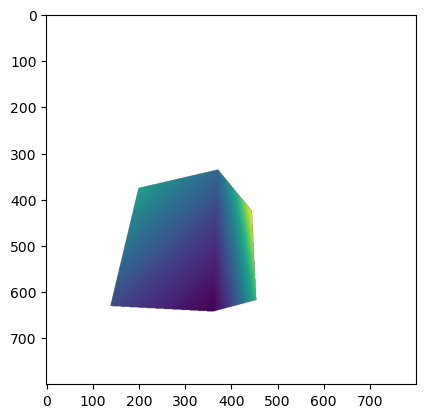

In [56]:
import matplotlib.pyplot as plt
plt.imshow(ans['t_hit'].numpy())

[[inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]
 ...
 [inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]] [[4294967295 4294967295 4294967295 ... 4294967295 4294967295 4294967295]
 [4294967295 4294967295 4294967295 ... 4294967295 4294967295 4294967295]
 [4294967295 4294967295 4294967295 ... 4294967295 4294967295 4294967295]
 ...
 [4294967295 4294967295 4294967295 ... 4294967295 4294967295 4294967295]
 [4294967295 4294967295 4294967295 ... 4294967295 4294967295 4294967295]
 [4294967295 4294967295 4294967295 ... 4294967295 4294967295 4294967295]]


In [57]:
hit = ans['t_hit'].isfinite()
points = rays[hit][:,:3] + rays[hit][:,3:]*ans['t_hit'][hit].reshape((-1,1))
pcd = o3d.t.geometry.PointCloud(points)
# Press Ctrl/Cmd-C in the visualization window to copy the current viewpoint
o3d.visualization.draw_geometries([pcd.to_legacy()],
                                  front=[0.5, 0.86, 0.125],
                                  lookat=[0.23, 0.5, 2],
                                  up=[-0.63, 0.45, -0.63],
                                  zoom=0.7)

In [58]:
print('input')
# fit to unit cube
mesh.scale(1 / np.max(mesh.get_max_bound() - mesh.get_min_bound()),
           center=mesh.get_center())
o3d.visualization.draw_geometries([mesh])

print('voxelization')
voxel_grid = o3d.geometry.VoxelGrid.create_from_triangle_mesh(mesh,
                                                              voxel_size=0.05)
o3d.visualization.draw_geometries([voxel_grid])

input


TypeError: max(): incompatible function arguments. The following argument types are supported:
    1. (self: open3d.cpu.pybind.core.Tensor, dim: Optional[open3d.cpu.pybind.core.SizeVector] = None, keepdim: bool = False) -> open3d.cpu.pybind.core.Tensor

Invoked with: [7 7 6]
Tensor[shape={3}, stride={1}, Float32, CPU:0, 0x25207f22850]; kwargs: axis=None, out=None

In [63]:
import open3d as o3d
import numpy as np

mesh = o3d.io.read_triangle_mesh("D:/Geomatics/thesis/objtryouts/square.obj")
mesh = o3d.t.geometry.TriangleMesh.from_legacy(mesh)

print('Input')

min_bound = mesh.get_min_bound()
max_bound = mesh.get_max_bound()

min_bound = np.asarray(min_bound)
max_bound = np.asarray(max_bound)

# Calculate scale factor to fit to unit cube
scale_factor = 1 / np.max(max_bound - min_bound)

center = mesh.get_center()
mesh.scale(scale_factor, center=center)

o3d.visualization.draw_geometries([mesh])

print('Voxelization')

voxel_size = 0.05
voxel_grid = o3d.geometry.VoxelGrid.create_from_triangle_mesh(mesh, voxel_size)
o3d.visualization.draw_geometries([voxel_grid])

Input


TypeError: scale(): incompatible function arguments. The following argument types are supported:
    1. (self: open3d.cpu.pybind.t.geometry.TriangleMesh, scale: float, center: open3d.cpu.pybind.core.Tensor) -> open3d.cpu.pybind.t.geometry.TriangleMesh

Invoked with: TriangleMesh on CPU:0 [24 vertices (Float32) and 12 triangles (Int64)].
Vertex Attributes: normals (dtype = Float32, shape = {24, 3}).
Triangle Attributes: None., 0.14285715
Tensor[shape={}, stride={}, Float32, CPU:0, 0x25202b5e210]; kwargs: center=[8.5 7.5 3]
Tensor[shape={3}, stride={1}, Float32, CPU:0, 0x25207f23840]

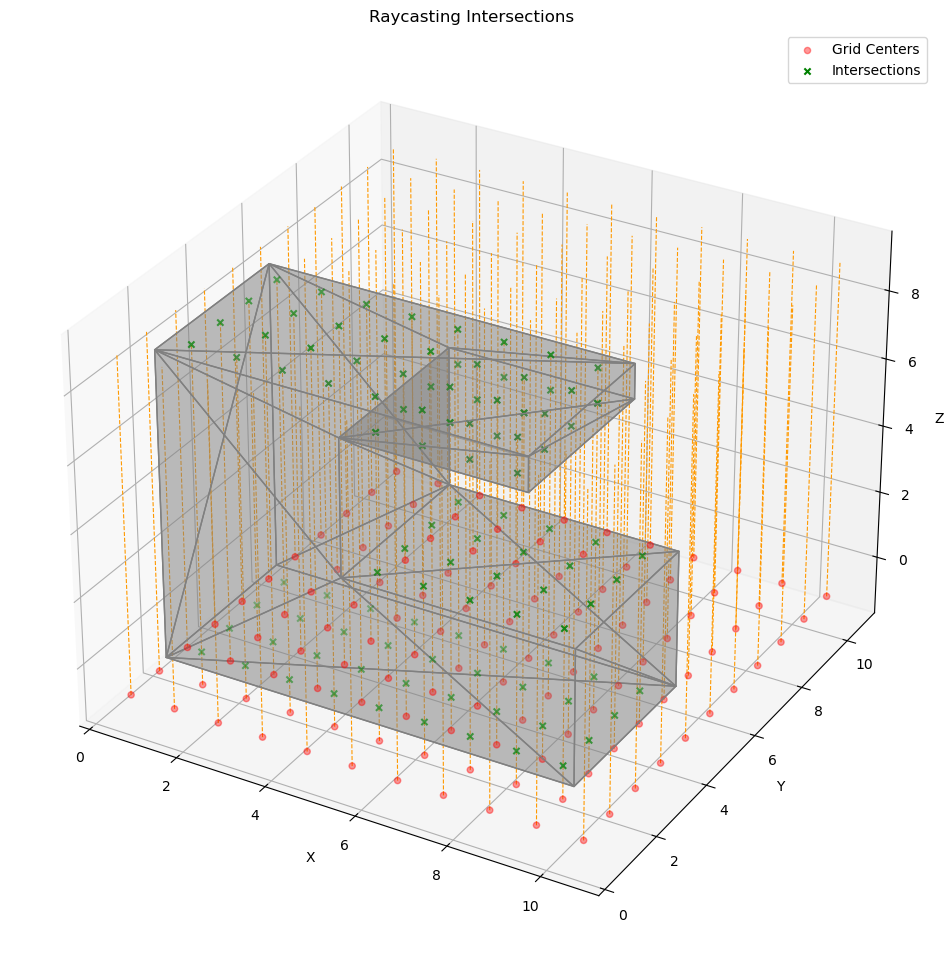

In [25]:
import numpy as np
import trimesh
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Ray-Triangle Möller–Trumbore
def ray_intersects_triangle(ray_origin, ray_direction, triangle):
    v0, v1, v2 = triangle
    e1 = v1 - v0
    e2 = v2 - v0
    h = np.cross(ray_direction, e2)
    a = np.dot(e1, h)

    if abs(a) < 1e-6:
        return False, None  # Ray is parallel to the triangle

    f = 1.0 / a
    s = ray_origin - v0
    u = f * np.dot(s, h)

    if u < 0.0 or u > 1.0:
        return False, None

    q = np.cross(s, e1)
    v = f * np.dot(ray_direction, q)

    if v < 0.0 or u + v > 1.0:
        return False, None

    t = f * np.dot(e2, q)

    if t > 1e-6:
        intersection_point = ray_origin + ray_direction * t
        return True, intersection_point

    return False, None

# Create grid centers
def generate_grid_centers(grid_size, cell_size):
    grid_centers = []
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            x = (i + 0.5) * cell_size[0]
            y = (j + 0.5) * cell_size[1]
            grid_centers.append(np.array([x, y, -1]))
    return grid_centers

# Load mesh from a file using trimesh
def load_mesh(file_path):
    mesh = trimesh.load(file_path)
    vertices = mesh.vertices
    faces = mesh.faces
    return vertices, faces

# Compute the bounding box of the mesh
def compute_bounding_box(vertices):
    min_bounds = np.min(vertices, axis=0)
    max_bounds = np.max(vertices, axis=0)
    return min_bounds, max_bounds

# Check if the grid cell is inside the mesh bounding box
def is_within_bounding_box(cell_center, min_bounds, max_bounds, cell_size):
    # Check if the center of the grid cell is inside the bounding box
    return (min_bounds[0] <= cell_center[0] <= max_bounds[0] and
            min_bounds[1] <= cell_center[1] <= max_bounds[1])

# Raycast and check intersections
def raycast(grid_centers, vertices, faces, min_bounds, max_bounds, cell_size):
    intersections = []
    ray_direction = np.array([0, 0, 1])

    for center in grid_centers:
        if is_within_bounding_box(center, min_bounds, max_bounds, cell_size):
            for face in faces:
                triangle = vertices[face]
                hit, point = ray_intersects_triangle(center, ray_direction, triangle)
                if hit:
                    intersections.append((center, point))

    return intersections

def plot_raycast(grid_centers, vertices, faces, intersections):
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111, projection='3d')

    for face in faces:
        triangle = vertices[face]
        verts = [triangle]
        ax.add_collection3d(Poly3DCollection(verts, color='grey', alpha=0.3))

    # Plot the grid centers (rays' start points)
    grid_centers = np.array(grid_centers)
    ax.scatter(grid_centers[:, 0], grid_centers[:, 1], grid_centers[:, 2], color='red', alpha=0.4, marker='o', label='Grid Centers')

    for center in grid_centers:
        ax.plot([center[0], center[0]],
                [center[1], center[1]],
                [center[2], center[2] + 10],
                color=(1.0, 0.6, 0, 1),
                linewidth=0.8, linestyle='--')

    if intersections:
        intersections = np.array([point for _, point in intersections])
        ax.scatter(intersections[:, 0], intersections[:, 1], intersections[:, 2], color='green', marker='x', label='Intersections')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Raycasting Intersections')
    ax.legend()

    plt.show()

mesh_file = "D:/Geomatics/thesis/objtryouts/objtest.obj"

vertices, faces = load_mesh(mesh_file)

min_bounds, max_bounds = compute_bounding_box(vertices)

# Grid and Mesh Setup
grid_size = (11, 11)
cell_size = (1, 1)
grid_centers = generate_grid_centers(grid_size, cell_size)

# Perform raycasting
intersections = raycast(grid_centers, vertices, faces, min_bounds, max_bounds, cell_size)
# print(intersections)

# Plotting the results
plot_raycast(grid_centers, vertices, faces, intersections)